# Módulo 12: Módulos y Paquetes

## Introducción, importación de funciones y trabajando con módulos

- Cualquier archivo Python es un módulo. Contiene funcioens dentro de su codigo
- Un paquete es un conjunto de módulos de Python en forma de una colección que sirve para inicializar el código

In [12]:
# Importación de funciones

import csv
import os
# cwd = os.chdir('d:/Documentos/DataAnalysis/EBAC/Python/Modulo12/')
cwd = os.getcwd()
print(cwd)

d:\Documentos\DataAnalysis\EBAC\Python\Modulo12


In [42]:
file = open(r'./netflix_titles.csv', encoding='UTF-8')
csvreader = csv.reader(file, )
type(csvreader)

_csv.reader

In [43]:
header = []
header + next(csvreader)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [44]:
rows = []
for row in csvreader:
    rows.append(row)


In [46]:
print(rows[:2])

[['s1', 'Movie', 'Dick Johnson Is Dead', 'Kirsten Johnson', '', 'United States', 'September 25, 2021', '2020', 'PG-13', '90 min', 'Documentaries', 'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'], ['s2', 'TV Show', 'Blood & Water', '', 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'South Africa', 'September 24, 2021', '2021', 'TV-MA', '2 Seasons', 'International TV Shows, TV Dramas, TV Mysteries', 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.']]


### Uso de funciones estadísticas

In [48]:
from statistics import mean, median, mode, stdev

In [50]:
test_scores = [1,2,3,4,5]
mean(test_scores)

3

In [52]:
import numpy as np
movies = np.array(rows)
movies[0]

array(['s1', 'Movie', 'Dick Johnson Is Dead', 'Kirsten Johnson', '',
       'United States', 'September 25, 2021', '2020', 'PG-13', '90 min',
       'Documentaries',
       'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
      dtype='<U771')

In [70]:
# Obtener columna del año para todas las películas (columna 8)

movies[:,7].dtype     # Sin embargo es un string

dtype('<U771')

In [71]:
# Pasar los años de string a int

release_year = movies[:,7]
release_year = release_year.astype(np.int64)
release_year.dtype


dtype('int64')

In [73]:
# Uso de mean
mean(release_year)


2014

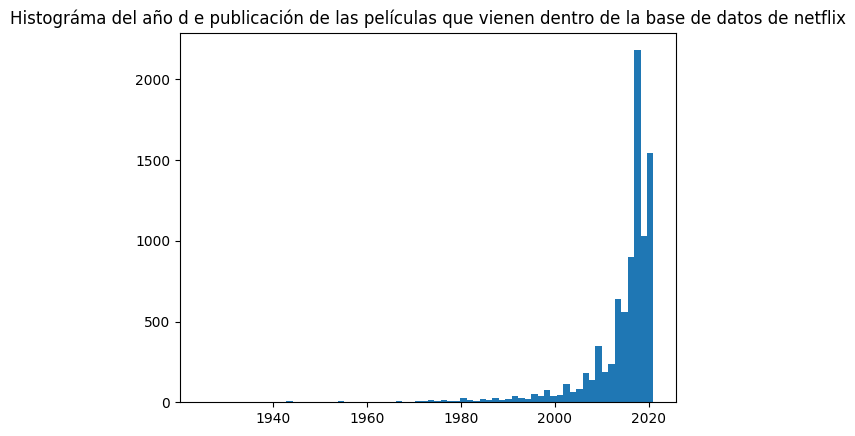

In [80]:
import matplotlib.pyplot as plt
plt.hist(release_year, bins=70)
plt.title('Histográma del año d e publicación de las películas que vienen dentro de la base de datos de netflix')
plt.show()

## Trabajando con paquetes y uso de paquetes de la web

### Trabajando con paquetes

In [83]:
# Trabajaremos con la duración. El ancance será solamente de las películas, por lo que todas las duraciónes con "Seasons" no entrará
duration = movies[:, 9]
duration[:10]

array(['90 min', '2 Seasons', '1 Season', '1 Season', '2 Seasons',
       '1 Season', '91 min', '125 min', '9 Seasons', '104 min'],
      dtype='<U771')

In [94]:
# Eliminar registros con duración medida por temporadas y dejar solamente duraciones en minutos
duration_min = duration[np.char.endswith(duration, 'min')]

# Strip de la palabra min para unicamente dejar el valor
duration_min = np.char.strip(duration_min, 'min')

# Convertir a int
duration_min = duration_min.astype(np.int64)

In [99]:
print(f'La película con menor duración es de {duration_min.min()} minutos')
print(f'La película con mayor duración es de {duration_min.max()} minutos')
print(f'La duración promedio de las películas de la base de datos es de {int(duration_min.mean())} minutso')
print(f'La desviación estandar de la duración de las películas en la base de datos es de {int(stdev(duration_min))} minutos')

La película con menor duración es de 3 minutos
La película con mayor duración es de 312 minutos
La duración promedio de las películas de la base de datos es de 99 minutso
La desviación estandar de la duración de las películas en la base de datos es de 28 minutos


In [103]:
# Filtrar para la película más larga

mask = (duration == '3 min')
print(mask)
dur_array3min = movies[mask]
print(dur_array3min)

[False False False ... False False False]
[['s3778' 'Movie' 'Silent' 'Limbert Fabian, Brandon Oldenburg' ''
  'United States' 'June 4, 2019' '2014' 'TV-Y' '3 min'
  'Children & Family Movies, Sci-Fi & Fantasy'
  '"Silent" is an animated short film created by Academy Award® winning Moonbot Studios. It celebrates how storytellers, inventors, and technology work together to create cinema magic.']]
